# Brownian Motion I: Introduction and simple calculus

In mathematical terms, Brownian Motion is a continuous-time stochastic process that satisfies certain statistical properties, such as being Markovian/Martingale, having independent increments, and having normally distributed increments. In finance, Brownian Motion is often used to model the random movement of asset prices over time, with the idea that the movement is caused by a large number of random events and cannot be predicted with certainty. This is the basis for the famous Black-Scholes model, which is used to price options and other financial derivatives.

It is denoted $lim_{n\to\infty}W^{(n)}(t) \sim N(0, t)$ and has several properties worth to mention, especially for $W:[O, T]x\Omega\to R$:
* $W_0 = 0$
* W has independent and Gaussian(normal) increments
* W has continuous sample paths (almost surely)

For $W_t \sim N(0, t)$ it is said that:
* $E(W_{t_{i+1}} - W_{t_{i+1}}) = 0$ and $Var(W_{t_{i+1}} - W_{t_{i+1}}) = t_{i+1} - t_i$

In [1]:
import  math
import itertools
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.style.use('dark_background')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Symmetric Random Walk
Noting coin tosses as $\omega_i$ as $\omega = \omega_1\omega_2 ... \omega_n$ and defining M as **nomber of simulations** with $M_0=0$
* $X_i = 1$ if $\omega_i = H $ and $X_i = -1$ if $\omega_i = T $ 
* $M_k = \Sigma^k_{j=1}X_j$

The random walk takes all properties of Brownian Motion, including Markovian and Martingale properties. The expectation $E[...|F_k]$ is the conditional expectation based on information up to time k. $F_k$ is a filtration, the $\sigma$-algebra of information corresponding to first k coin tosses

$E[M_l|F_k] = E[(M_l - M_k) + M_k|F_k] = E[M_l - M_k] + E[M_k|F_k] 
            = E[M_l - M_k|F_k] + M_k = M_k$

The quadratic variation, however, will be computed Path-by-Path, one increment at a time:

$[M, M]_k = \Sigma^k_{j=1}(M_j - M_{j-1})^2 = k$

Text(0, 0.5, 'Steps')

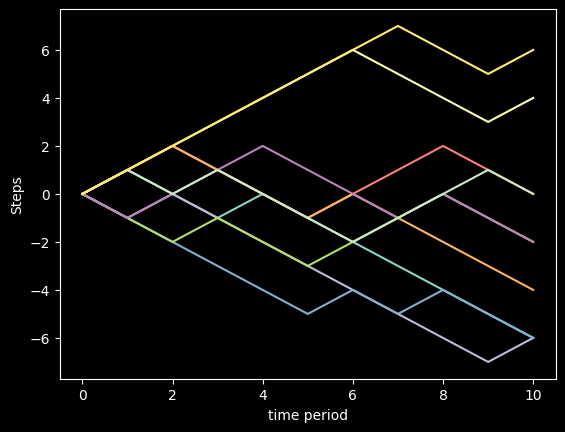

In [15]:
M=10
t=10 ##time
random_walk = [-1, 1]
steps = np.random.choice(random_walk, size=(M, t)).T
origin = np.zeros((1, M))
rw_paths = np.concatenate([origin, steps]).cumsum(axis=0)

plt.plot(rw_paths)
plt.xlabel('time period')
plt.ylabel('Steps')

In [16]:
quad_var = lambda x: round(np.square(x[:-1] - x[1:]).sum(),3)
var = lambda x: round(np.var(x, axis=0,), 3)
print([quad_var(path) for path in rw_paths.T[:4]])
print([var(path) for path in rw_paths[1:11]])

[10.0, 10.0, 10.0, 10.0]
[0.96, 2.24, 3.24, 5.96, 9.64, 11.56, 13.64, 12.64, 13.16, 15.84]


## Scaled Symmetric Random Walk
To approximate a Brownian Motion, the step size may be scaled as well as time may be sped up: $W^{(n)}(t) = \frac{M_{nt}}{\sqrt{n}}$

Text(0, 0.5, 'Steps')

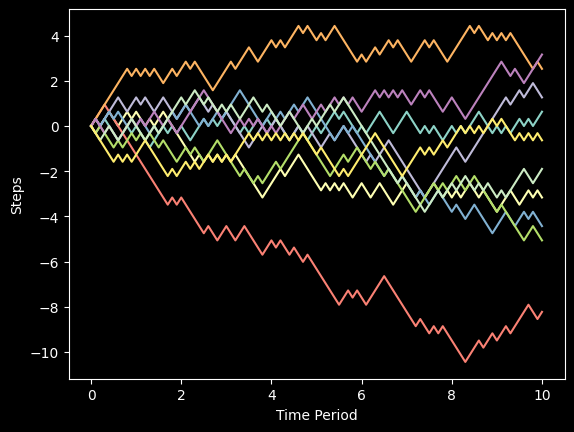

In [19]:
n = 10
steps = (1/np.sqrt(n)) * np.random.choice(random_walk, size=(M, t*n)).T
origin = np.zeros((1, M))
srw_paths = np.concatenate([origin, steps]).cumsum(axis=0)

time = np.linspace(0, t, t*n+1)
tt = np.full(shape=(M, t*n+1), fill_value=time)
tt=tt.T
plt.plot(tt, srw_paths)
plt.xlabel('Time Period')
plt.ylabel('Steps')

## Limit of Binomial Distribution
As n increases, the binomial distibution converges to the normal distribution with variance t, çàd $W^{(n)}(t) = \frac{M_{nt}}{\sqrt{n}}$

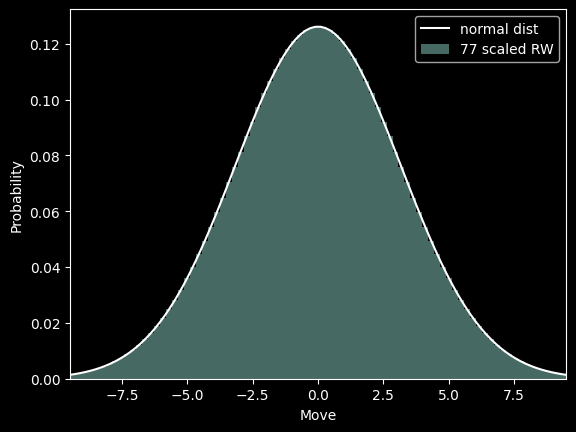

In [30]:
n, t = 77, 10

def nCr(n, k):
    f = math.factorial
    denom = f(k) * f(n-k)
    return f(n)/denom

perms = [nCr(n*t, k)*(0.5)**(n*t) for k in range(int(n*t)+1)]
W_nt = lambda n,t: 1/np.sqrt(n) * np.arange(-n*t, n*t+1, 2)
out = W_nt(n, t)
plt.bar(out, [perm/(out[1]-out[0]) for perm in perms], out[1]-out[0],
        label=f'{n} scaled RW', alpha=0.5)
x = np.linspace(-3*np.sqrt(t), 3*np.sqrt(t), 100)

plt.plot(x, stats.norm.pdf(x, 0, np.sqrt(t)), c='white', label='normal dist')
plt.xlim(-3*np.sqrt(t), 3*np.sqrt(t))
plt.ylabel('Probability')
plt.xlabel('Move')
plt.legend()

Text(0, 0.5, 'Move')

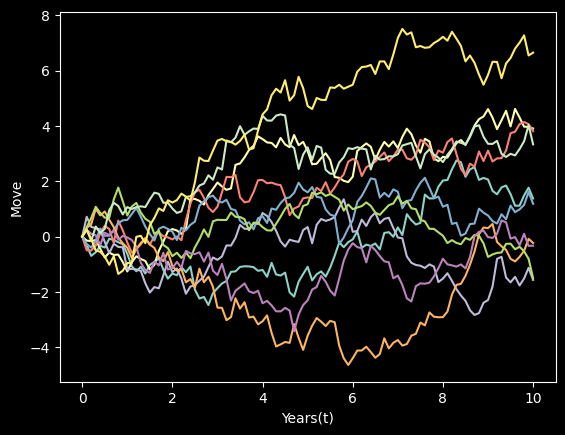

In [35]:
M = 10       #nb simulations
t = 10       #time
n = 100      #steps
dt = t/n     #time step

steps = np.random.normal(0, np.sqrt(dt), size=(M, n)).T
origin = np.zeros((1, M))
bm_paths = np.concatenate([origin, steps]).cumsum(axis=0)

time = np.linspace(0, t, n+1)
tt = np.full(shape=(M, n+1), fill_value=time)
tt = tt.T

plt.plot(tt, bm_paths)
plt.xlabel('Years(t)')
plt.ylabel('Move')

In [37]:
print([quad_var(path) for path in bm_paths.T[:4]])
print([var(path) for path in bm_paths[1:11]])

[9.909, 9.834, 11.204, 10.542]
[0.127, 0.172, 0.299, 0.213, 0.281, 0.355, 0.439, 0.722, 0.532, 0.61]


# Brownian Motion II: Geometric Brownian Motion

The theory of Brownian motion helps to explain how asset prices can follow a random walk, where the price movements are unpredictable in the short term, but over longer time horizons, the prices tend to converge to a long-term trend. The random walk behavior of asset prices is important for pricing financial derivatives such as options, as the value of these instruments depends on the underlying asset price and its future expected volatility.

GBM S in defined by $S_0 > 0$ and the dynamics as defined following differential equation:

$dS_t = \mu S_tdt + \sigma S_tdW_t$ where
* $\mu$ is coefficient of drift
* $\sigma$ is coefficient of volatility

In integrated form, the GBM follows the normal distribution: $log(S_t) \sim N(log(S_0) + (\mu - \frac{\sigma^2}{2})t, \sigma^2t)$
In the same way, the explicit expression for $S_t$ would be 
##### $S_t = S_0e^{(\mu - \frac{\sigma^2}{2})t + \sigma W_t}$

In [38]:
mu = 0.1
n = 100
T = 1
M = 100
S0 = 100
sigma = 0.3 # in %

dt = T/n # timestep
St = np.exp((mu-sigma**2/2)*dt + sigma*np.random.normal(0, np.sqrt(dt), size=(M,n)).T)
St = np.vstack([np.ones(M), St])
St = S0 * St.cumprod(axis=0)
St[1]

array([103.04515174,  96.15025343, 100.28407344, 100.04312295,
        99.46566032,  99.13123602,  99.29184888,  97.59723705,
       100.0008105 ,  99.72007959,  98.70039369,  99.12643247,
       101.66972932, 103.69933386,  97.15852632, 103.30053318,
        92.85765539, 104.94782265,  97.61248334, 101.3859864 ,
       100.21117083, 101.66646803,  96.32384641, 102.14437307,
       100.94311249, 101.40236781,  96.5377583 , 103.70047487,
       102.77199871,  98.91600338,  99.8524897 , 100.19811587,
        97.08093045,  95.06028212, 100.76676681,  99.35179383,
        92.17282037, 101.39477545,  95.79563958, 103.87353693,
       100.21343811,  98.90536926, 102.71947727, 105.26665386,
       105.12100361, 108.04981495,  98.82349994, 104.32548558,
       101.20967268,  99.25992345,  97.85794493,  99.25426485,
       100.74199174,  96.3345303 , 101.19524066, 103.42229242,
        98.58211856, 101.73110355, 102.38342724, 102.42466029,
        96.49042117,  99.48367205, 104.04648682,  99.01

Text(0.5, 1.0, 'GBM\n $dS_t = \\mu S_tdt + \\sigma S_tdW_t$\n $S_0=100$, $\\mu =0.1$, $\\sigma =0.3$')

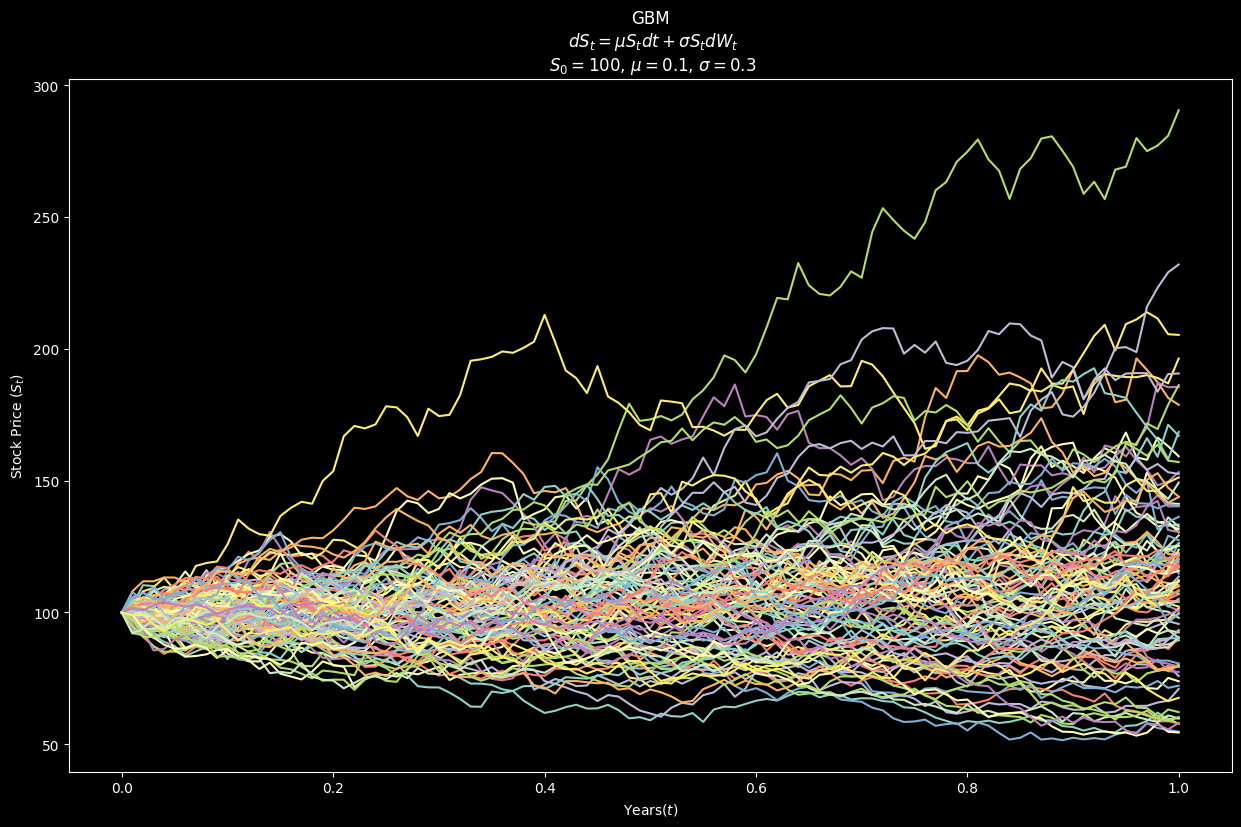

In [39]:
time = np.linspace(0, T, n+1)
tt = np.full(shape=(M, n+1), fill_value=time).T

plt.figure(figsize=(15, 9))
plt.plot(tt, St)
plt.xlabel('Years$(t)$')
plt.ylabel('Stock Price $(S_t)$')
plt.title('GBM\n $dS_t = \mu S_tdt + \sigma S_tdW_t$\n $S_0=100$, $\mu =0.1$, $\sigma =0.3$')
          